# Progress

# Data Science Project

In [1]:
# When we will apply a machine learning techniques there can be warning we just don't want to see them.
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import libraries for visualization and analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as ltb

## First Look For Our Dataset 

In [3]:
maclar = pd.read_csv('results.csv')
maclar_cleaning_importance = maclar.copy() 
# We get a copy our first dataset before we do any modifying or cleaning process. So we will compare this dataset and the lastest dataset accuracy at the end.
maclar.head()
# First look to our dataset, column's names and variable types.

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


**Explore the Data**

In [4]:
maclar.info() 
# We reliase that we got 41540 rows 
# We have different type of variables in our dataset like object, bool, int etc.
# When we try to apply Machine learning algorithms to our final dataset we will change all this variable type to integer type because
# these algorihms good at math.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41540 entries, 0 to 41539
Data columns (total 9 columns):
date          41540 non-null object
home_team     41540 non-null object
away_team     41540 non-null object
home_score    41540 non-null int64
away_score    41540 non-null int64
tournament    41540 non-null object
city          41540 non-null object
country       41540 non-null object
neutral       41540 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [5]:
maclar.isnull().sum()
# We don't have any missing value in our dataset.

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [6]:
maclar.shape

(41540, 9)

In [7]:
maclar.describe().T

,count,mean,std,min,25%,50%,75%,max
home_score,41540.0,1.745643,1.753444,0.0,1.0,1.0,2.0,31.0
away_score,41540.0,1.187819,1.405511,0.0,0.0,1.0,2.0,21.0


**date** - Date of the match.

**home_team** - Home team name.

**away_team** - Away team name.

**home_team_score** - Score of home team (when the match is over).

**away_team_score** - Score of away team (when the match is over).

**tournament** - Type of match (FIFA, Friendly etc.).

**city** - City where the match was played.

**country** - Country where the match was played.

**neutral** - Whether the match was played at a neutral venue or not.


## Making new variables

We think that before do visualization or analysis we need to create new columns. We will create 5 new columns these are day, 
mouth, year, who_win, total_goal. Month can be effective while we looking up the total goal statistic. If it is winter there can be less goal or how effective is the weather?
Year also can be important because teams can have different performans in different year.

**day** - Day of the match.

**month** - Month of match.

**year** - Year of match.

**who_win** - Which team win the match.

**total_goal** - Total goal score.

In [8]:
maclar['year'] = maclar.date.str.split('-').str[0]
maclar['month'] = maclar.date.str.split('-').str[1]
maclar['day'] = maclar.date.str.split('-').str[2]
maclar.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,day
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,30
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,03,08
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,03,07
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,03,06
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,03,04


In [9]:
maclar['total_goal'] = maclar.home_score + maclar.away_score
maclar['who_win'] = np.where((maclar.home_score > maclar.away_score), '1',
                            np.where(maclar.home_score < maclar.away_score, '2','0'))
maclar.head(10) 
# 1 means that home team won
# 2 means that away team won
# 0 means that draw

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,day,total_goal,who_win
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,30,0,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,03,08,6,1
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,03,07,3,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,03,06,4,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,03,04,3,1
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,1876,03,25,4,1
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,1877,03,03,4,2
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,1877,03,05,2,2
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,1878,03,02,9,1
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,1878,03,23,9,1


In [10]:
# Now we can drop to date-home_score-away_score because we got what we want
maclar = maclar.drop('date', axis = 1)
maclar = maclar.drop('home_score', axis = 1)
maclar = maclar.drop('away_score', axis = 1)
maclar.head()

,home_team,away_team,tournament,city,country,neutral,year,month,day,total_goal,who_win
0,Scotland,England,Friendly,Glasgow,Scotland,False,1872,11,30,0,0
1,England,Scotland,Friendly,London,England,False,1873,03,08,6,1
2,Scotland,England,Friendly,Glasgow,Scotland,False,1874,03,07,3,1
3,England,Scotland,Friendly,London,England,False,1875,03,06,4,0
4,Scotland,England,Friendly,Glasgow,Scotland,False,1876,03,04,3,1


In [11]:
# If we check the month type, it is integer.
# We need to change it to the season (summer, winter etc.).
maclar.month = maclar.month.astype(str)
maclar['season'] = np.where((maclar.month == '12') | (maclar.month == '01') | (maclar.month == '02'), 'Winter',
                           np.where((maclar.month == '03') | (maclar.month == '04') | (maclar.month == '05'), 'Spring',
                                    np.where((maclar.month == '06') | (maclar.month =='07') | (maclar.month == '08') , 'Summer',
                                            'Fall')))
maclar.drop('month' , axis = 1, inplace = True)
maclar.head()

,home_team,away_team,tournament,city,country,neutral,year,day,total_goal,who_win,season
0,Scotland,England,Friendly,Glasgow,Scotland,False,1872,30,0,0,Fall
1,England,Scotland,Friendly,London,England,False,1873,08,6,1,Spring
2,Scotland,England,Friendly,Glasgow,Scotland,False,1874,07,3,1,Spring
3,England,Scotland,Friendly,London,England,False,1875,06,4,0,Spring
4,Scotland,England,Friendly,Glasgow,Scotland,False,1876,04,3,1,Spring


In [12]:
# We already have the country so we can drop the city.
maclar = maclar.drop('city', axis = 1)
maclar = maclar.drop('day', axis = 1)

## Analysis and Visualization

In [13]:
total_team = len(maclar.home_team.value_counts().index)
total_tournament = len(maclar.tournament.value_counts().index)
print("Total team number: ", total_team)
print("Total tournament: ", total_tournament)

Total team number:  309
Total tournament:  112


In [14]:
# We got over 300 teams and over 100 tournament

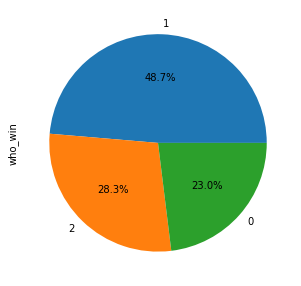

In [15]:
maclar['who_win'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%',figsize = (5,5))

In [16]:
# Looks like being a home team is a huge advantage but it can be even more advantage than we see. 
# We know that being a home team means that match is playing in your country but there are some matches in our dataset which
# looks like a team a home team but there are not.
maclar[maclar.home_team != maclar.country].shape 

(10987, 9)

In [17]:
# There are over 10k teams which is not home team but it looks like it so we drop them to see the real effect of being a home team
maclar = maclar.drop(maclar[maclar.home_team != maclar.country].index)
maclar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30553 entries, 0 to 41539
Data columns (total 9 columns):
home_team     30553 non-null object
away_team     30553 non-null object
tournament    30553 non-null object
country       30553 non-null object
neutral       30553 non-null bool
year          30553 non-null object
total_goal    30553 non-null int64
who_win       30553 non-null object
season        30553 non-null object
dtypes: bool(1), int64(1), object(7)
memory usage: 2.1+ MB


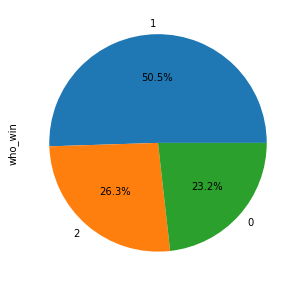

In [18]:
# Now we got 30553 total rows let's see the real effect of being home_team
maclar['who_win'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%',figsize = (5,5))
# As we said earlier:
# 1 means that home team won
# 2 means that away team won
# 0 means that draw

In [19]:
# Being a home team is a huge advantage so when we realise these we figure out country column is very important because it is relate to home team
maclar.neutral[maclar.neutral == True].shape

(8,)

In [20]:
# When we drop that 10k rows, neutral column become meanless because there are only 8 rows which neutral = True so we drop neutral column
maclar = maclar.drop('neutral', axis = 1)
maclar.head()

,home_team,away_team,tournament,country,year,total_goal,who_win,season
0,Scotland,England,Friendly,Scotland,1872,0,0,Fall
1,England,Scotland,Friendly,England,1873,6,1,Spring
2,Scotland,England,Friendly,Scotland,1874,3,1,Spring
3,England,Scotland,Friendly,England,1875,4,0,Spring
4,Scotland,England,Friendly,Scotland,1876,3,1,Spring


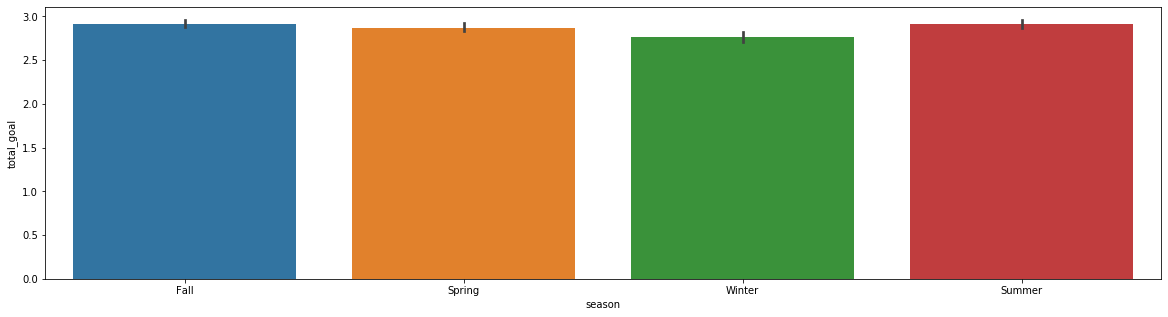

In [21]:
plt.figure(figsize = (20,5))
sns.barplot(x = 'season', y = 'total_goal' , data = maclar);

In [22]:
ort_total_goal = maclar.total_goal[maclar.season == "Winter"].mean()
ort_total_goal2 = maclar.total_goal[maclar.season == "Spring"].mean()
ort_total_goal3 = maclar.total_goal[maclar.season == "Summer"].mean()
ort_total_goal4 = maclar.total_goal[maclar.season == "Fall"].mean()
print("Average total goal in Winter: ", ort_total_goal)
print("Average total goal in Spring: ", ort_total_goal2)
print("Average total goal in Summer: ", ort_total_goal3)
print("Average total goal in Fall: ", ort_total_goal4)

Average total goal in Winter:  2.7642220699108977
Average total goal in Spring:  2.8715112540192926
Average total goal in Summer:  2.9109672197490895
Average total goal in Fall:  2.9143611212231524


In [23]:
# Before continue to changing all value to a integer value, we think that type of tournament can be more important than we think. Because
# for example if it is a friendly match teams can try new thing such as offensive football or defensive footbal. In short they can try new tactics and that can effect their
# match results. To prove that we will test some certain teams
maclar.home_team.value_counts().head()
#Looks like Sweden, England, France etc. are good team to try our test because they have the most data

Sweden     449
England    446
France     432
Hungary    421
Germany    415
Name: home_team, dtype: int64

In [24]:
maclar.home_team[maclar.tournament == "Friendly"].value_counts().head(10)

Germany          290
France           288
Hungary          267
Austria          245
Sweden           245
Belgium          239
Switzerland      236
Netherlands      236
Poland           232
United States    211
Name: home_team, dtype: int64

In [25]:
total_win_rate_sweden = (maclar.who_win[(maclar.home_team == "Sweden") & (maclar.who_win == "1")].value_counts()) / 449
total_win_rate_sweden_friendly = (maclar.who_win[(maclar.home_team == "Sweden") & (maclar.who_win == "1") & (maclar.tournament == "Friendly")].value_counts()) / 245
total_win_rate_germany = (maclar.who_win[(maclar.home_team == "Germany") & (maclar.who_win == "1")].value_counts()) / 415
total_win_rate_germany_friendly = (maclar.who_win[(maclar.home_team == "Sweden") & (maclar.who_win == "1") & (maclar.tournament == "Friendly")].value_counts()) / 290
total_win_rate_england = (maclar.who_win[(maclar.home_team == "England") & (maclar.who_win == "1")].value_counts()) / 446
total_win_rate_england_friendly = (maclar.who_win[(maclar.home_team == "England") & (maclar.who_win == "1") & (maclar.tournament == "Friendly")].value_counts()) / 189
total_win_rate_france= (maclar.who_win[(maclar.home_team == "France") & (maclar.who_win == "1")].value_counts()) / 432
total_win_rate_france_friendly = (maclar.who_win[(maclar.home_team == "France") & (maclar.who_win == "1") & (maclar.tournament == "Friendly")].value_counts()) / 288
print(total_win_rate_sweden)
print(total_win_rate_sweden_friendly)
print(total_win_rate_germany)
print(total_win_rate_germany_friendly)
print(total_win_rate_england)
print(total_win_rate_england_friendly)
print(total_win_rate_france)
print(total_win_rate_france_friendly)
## All these 4 teams shows that worse performance than general we don't think this is a coincidence and we decided to not trust worhless tournament.

1    0.594655
Name: who_win, dtype: float64
1    0.542857
Name: who_win, dtype: float64
1    0.631325
Name: who_win, dtype: float64
1    0.458621
Name: who_win, dtype: float64
1    0.641256
Name: who_win, dtype: float64
1    0.587302
Name: who_win, dtype: float64
1    0.585648
Name: who_win, dtype: float64
1    0.517361
Name: who_win, dtype: float64


In [26]:
data = np.array([['Sweden', 59.4, 54.2], ['Germany', 63.1, 45.8], ['England', 64.1, 58.7],['France', 58.5, 51.7]])
print(data)

[['Sweden' '59.4' '54.2']
 ['Germany' '63.1' '45.8']
 ['England' '64.1' '58.7']
 ['France' '58.5' '51.7']]


In [27]:
dataset = pd.DataFrame({'Teams who have most matches': data[:,0], 'Average Win Rate': data[:,1], 'Average Friendly Match Win Rate': data[:,2]})
dataset.head()

,Teams who have most matches,Average Win Rate,Average Friendly Match Win Rate
0,Sweden,59.4,54.2
1,Germany,63.1,45.8
2,England,64.1,58.7
3,France,58.5,51.7


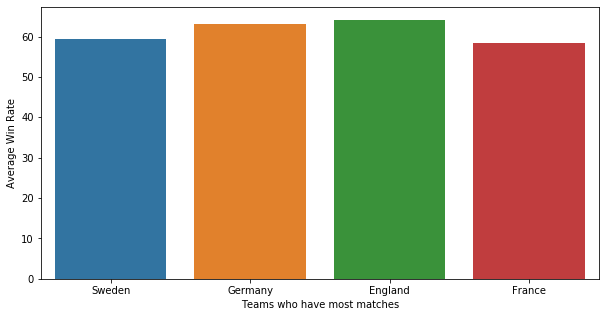

In [28]:
plt.figure(figsize = (10,5))
dataset['Average Win Rate'] = dataset['Average Win Rate'].astype(float)
dataset['Average Friendly Match Win Rate'] = dataset['Average Friendly Match Win Rate'].astype(float)

sns.barplot(x = 'Teams who have most matches', y = 'Average Win Rate', data = dataset);

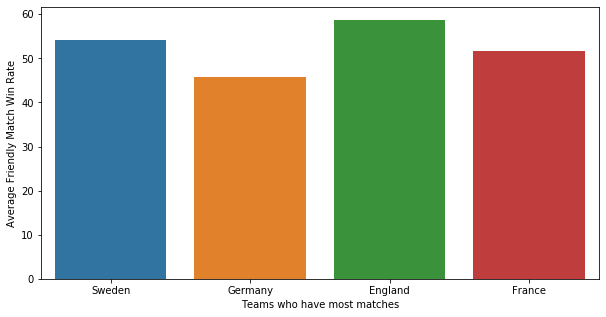

In [29]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Teams who have most matches', y = 'Average Friendly Match Win Rate', data = dataset);

In [30]:
maclar.tournament.value_counts().head(20)

Friendly                                14268
FIFA World Cup qualification             6659
UEFA Euro qualification                  2512
African Cup of Nations qualification     1615
AFC Asian Cup qualification               483
British Championship                      452
CFU Caribbean Cup qualification           395
Copa América                              284
Nordic Championship                       278
CECAFA Cup                                173
AFF Championship                          155
African Cup of Nations                    145
UEFA Nations League                       140
COSAFA Cup                                136
African Nations Championship              134
International Cup                         127
FIFA World Cup                            118
King's Cup                                109
Gulf Cup                                  104
Gold Cup                                   90
Name: tournament, dtype: int64

In [31]:
maclar.drop(maclar[(maclar["tournament"] != "FIFA World Cup qualification") & 
                  (maclar["tournament"] != "UEFA Euro qualification") & 
                  (maclar["tournament"] != "FIFA World Cup") &
                  (maclar["tournament"] != "African Cup of Nations qualification")].index, 
            axis = 0, inplace = True)
maclar = maclar.reset_index(drop=True)# We did a lot of drop operation before we do anything it will be better to reset index
maclar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10904 entries, 0 to 10903
Data columns (total 8 columns):
home_team     10904 non-null object
away_team     10904 non-null object
tournament    10904 non-null object
country       10904 non-null object
year          10904 non-null object
total_goal    10904 non-null int64
who_win       10904 non-null object
season        10904 non-null object
dtypes: int64(1), object(7)
memory usage: 681.6+ KB


In [32]:
maclar.tournament[(maclar.tournament == "FIFA World Cup") | (maclar.tournament == "FIFA World Cup qualification")] = "FIFA"
maclar.tournament[maclar.tournament == "UEFA Euro qualification"] = "UEFA"
maclar.tournament[maclar.tournament == "African Cup of Nations qualification"] = "African Cup"
maclar = maclar.drop('total_goal', axis = 1)
maclar.head()

,home_team,away_team,tournament,country,year,who_win,season
0,Uruguay,Peru,FIFA,Uruguay,1930,1,Summer
1,Uruguay,Romania,FIFA,Uruguay,1930,1,Summer
2,Uruguay,Yugoslavia,FIFA,Uruguay,1930,1,Summer
3,Uruguay,Argentina,FIFA,Uruguay,1930,1,Summer
4,Sweden,Estonia,FIFA,Sweden,1933,1,Summer


In [33]:
maclar.year.unique()

array(['1930', '1933', '1934', '1937', '1938', '1949', '1950', '1953',
       '1954', '1956', '1957', '1958', '1959', '1960', '1961', '1962',
       '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'], dtype=object)

In [34]:
maclar.who_win[(maclar.away_team == "Tunisia") & (maclar.season == "Winter") ].value_counts()

1    4
0    4
2    2
Name: who_win, dtype: int64

In [35]:
maclar.who_win[(maclar.away_team == "Tunisia") & (maclar.season != "Winter") ].value_counts()

2    28
1    27
0    24
Name: who_win, dtype: int64

In [36]:
maclar.who_win[(maclar.away_team == "Cyprus") & (maclar.season == "Winter") ].value_counts()

1    13
Name: who_win, dtype: int64

In [37]:
maclar.who_win[(maclar.away_team == "Cyprus") & (maclar.season != "Winter") ].value_counts()

1    77
2    12
0     7
Name: who_win, dtype: int64

In [38]:
maclar.who_win[(maclar.away_team == "Turkey") & (maclar.season == "Winter") ].value_counts()

1    6
0    2
Name: who_win, dtype: int64

In [39]:
maclar.who_win[(maclar.away_team == "Turkey") & (maclar.season != "Winter") ].value_counts()

1    48
2    35
0    28
Name: who_win, dtype: int64

In [40]:
Tunisia_win_rate_winter = (2/8)*100 
Tunisia_win_rate = (28/51)*100 
Cyprus_win_rate_winter = (0/13)*100 
Cyprus_win_rate = (12/84)*100 
Turkey_win_rate_winter = (0/8)*100 
Turkey_win_rate = (35/76)*100 

In [41]:
data = np.array([['Tunisia', Tunisia_win_rate_winter, Tunisia_win_rate], ['Cyprus', Cyprus_win_rate_winter, Cyprus_win_rate], ['Turkey', Turkey_win_rate_winter,Turkey_win_rate]])
dataset = pd.DataFrame({'Teams': data[:,0], 'Win Rate in Winter': data[:,1], 'Win Rate in other season': data[:,2]})
dataset.head()

,Teams,Win Rate in Winter,Win Rate in other season
0,Tunisia,25.0,54.90196078431373
1,Cyprus,0.0,14.285714285714285
2,Turkey,0.0,46.05263157894737


In [42]:
dataset['Win Rate in other season'] = dataset['Win Rate in other season'].astype(float)
dataset['Win Rate in Winter'] = dataset['Win Rate in Winter'].astype(float)

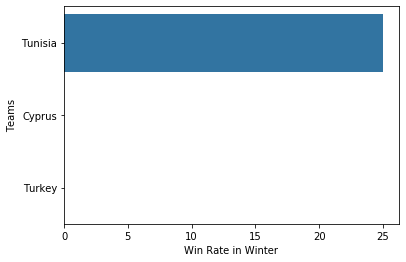

In [43]:
sns.barplot(x = 'Win Rate in Winter', y = 'Teams', data = dataset)

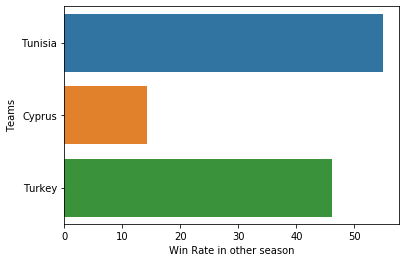

In [44]:
sns.barplot(x = 'Win Rate in other season', y = 'Teams', data = dataset)

In [45]:
# We have one more step. Year can be an important value but it is like this 1930-1931-1932-1933 etc. 
# This looks like regression problem but our problem is  aclassification problem. 
# We want to know who will win 0,1 or 2. We need to group the years and also drop the total_goal column because it has no effect on who will win.
maclar['year'] = np.where((maclar.year < '1950') , '0',
                           np.where((maclar.year > '1950') & (maclar.year < '1970'), '1',
                                    np.where((maclar.year > '1970') & (maclar.year < '1990'), '2',
                                             np.where((maclar.year > '1990') & (maclar.year < '2010'), '3',
                                                '4'))))
maclar.head()

,home_team,away_team,tournament,country,year,who_win,season
0,Uruguay,Peru,FIFA,Uruguay,0,1,Summer
1,Uruguay,Romania,FIFA,Uruguay,0,1,Summer
2,Uruguay,Yugoslavia,FIFA,Uruguay,0,1,Summer
3,Uruguay,Argentina,FIFA,Uruguay,0,1,Summer
4,Sweden,Estonia,FIFA,Sweden,0,1,Summer


In [46]:
maclar['season'] = np.where((maclar.season == 'Winter') , '0',
                           np.where((maclar.season == 'Fall'), '1',
                                    np.where((maclar.season == 'Spring'), '2',
                                             np.where((maclar.season == 'Summer'), '3',
                                               '4')))) 

In [47]:
maclar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10904 entries, 0 to 10903
Data columns (total 7 columns):
home_team     10904 non-null object
away_team     10904 non-null object
tournament    10904 non-null object
country       10904 non-null object
year          10904 non-null object
who_win       10904 non-null object
season        10904 non-null object
dtypes: object(7)
memory usage: 596.4+ KB


In [48]:
# Now our dataset is ready to prepare being apply machine learning
maclar.shape

(10904, 7)

## Final Step Before Apply Machine Learning Algorithms

In [49]:
# Before we apply machine learning algorithm we need to turn all of our value to an integer.
maclar.dtypes
# There are object.

home_team     object
away_team     object
tournament    object
country       object
year          object
who_win       object
season        object
dtype: object

In [50]:
print(maclar['home_team'].unique())
print(maclar['away_team'].unique())
print(maclar['tournament'].unique())
print(maclar['year'].unique())
#print(maclar['country'].unique())
print(maclar['season'].unique())
print(maclar['who_win'].unique())

['Uruguay' 'Sweden' 'Lithuania' 'Yugoslavia' 'Poland' 'Switzerland'
 'Haiti' 'Mexico' 'Luxembourg' 'Spain' 'Egypt' 'Portugal' 'Bulgaria'
 'Italy' 'Netherlands' 'Austria' 'Belgium' 'Romania' 'Finland' 'Latvia'
 'Germany' 'Norway' 'Greece' 'Hungary' 'Czechoslovakia' 'France'
 'Republic of Ireland' 'Israel' 'Northern Ireland' 'Wales' 'Scotland'
 'England' 'Turkey' 'Brazil' 'Saarland' 'Paraguay' 'Chile' 'Japan'
 'Guatemala' 'Costa Rica' 'Sudan' 'Peru' 'United States' 'Indonesia'
 'Denmark' 'German DR' 'Syria' 'China PR' 'Colombia' 'Canada' 'Iceland'
 'Bolivia' 'Argentina' 'Ghana' 'Honduras' 'Nigeria' 'Suriname' 'Morocco'
 'South Korea' 'Cyprus' 'Tunisia' 'Ecuador' 'Kenya' 'Uganda' 'Malta'
 'Guinea' 'Albania' 'Jamaica' 'Ivory Coast' 'Cuba' 'Trinidad and Tobago'
 'Ethiopia' 'Mali' 'Senegal' 'Liberia' 'Venezuela' 'Libya' 'Cameroon'
 'DR Congo' 'Algeria' 'Tanzania' 'Mauritius' 'Togo' 'Bermuda' 'Zambia'
 'El Salvador' 'Niger' 'Australia' 'Gabon' 'Madagascar' 'Congo'
 'Puerto Rico' 'Lesotho' 'Si

In [51]:
labelencoder = LabelEncoder()
# We want to change all variable types to integer
maclar.iloc[:,0] = labelencoder.fit_transform(maclar.iloc[:,0].values)
maclar.iloc[:,1] = labelencoder.fit_transform(maclar.iloc[:,1].values)
maclar.iloc[:,2] = labelencoder.fit_transform(maclar.iloc[:,2].values)
maclar.iloc[:,3] = labelencoder.fit_transform(maclar.iloc[:,3].values)
maclar.iloc[:,4] = labelencoder.fit_transform(maclar.iloc[:,4].values)
maclar.iloc[:,5] = labelencoder.fit_transform(maclar.iloc[:,5].values)
maclar.iloc[:,6] = labelencoder.fit_transform(maclar.iloc[:,6].values)

maclar.dtypes

home_team     int32
away_team     int32
tournament    int32
country       int32
year          int32
who_win       int32
season        int32
dtype: object

In [52]:
print(maclar['home_team'].unique())
print(maclar['away_team'].unique())
print(maclar['tournament'].unique())
print(maclar['year'].unique())
#print(maclar['country'].unique())
print(maclar['season'].unique())
print(maclar['who_win'].unique())
# They are all turn into a number

[203 184 113 211 152 185  86 124 114 180  60 153  29  96 134  11  18 157
  70 107  76 143  79  89  52  71 156  95 142 208 167  62 195  26 160 149
  40  99  82  46 182 150 202  92  54  75 186  41  43  35  90  23   7  77
  87 139 183 129 178  50 194  59 102 199 121  83   1  98  97  48 193  67
 120 168 110 206 111  34  53   2 189 123 191  21 212  61 138  10  72 116
  45 154 109 171   6 136  38  93 176  32  73 122  57 147 117  85  16 166
 172 155  88 104  20  80 130 213  69 159   4  66 115 133 118 100 190 210
  15  28  91  14 201 140  30  63 144 145  94 165  39 162 163  68  84 205
  25  36 175 137  65 177 158 132  51 108  74 112 141 173 174 200   8  47
  17 125  56   9 161  37  19 170  12 148 192  24  33 188 196 209 101 204
 207   3  64   5  27  13 198  55 187 119 106 151   0 126 105 181 128 164
 169  44 135 197 127  31 146  49  58  22  81 179  78 103  42 131]
[152 159 215   8  67 186 187  54  50  78 155  97 182  91  81 158  73  30
 136 206  12  72 115 109 116  19 154  98 169  64 212 144 1

In [53]:
test_maclar = maclar.tail(100)
maclar = maclar[:-100]
# We decided to make another dataset called test_maclar and there are 100 match in it just to make sure what will do our model if counter a different dataset

In [54]:
# We split our dataset into a test and training datasets
# 20 percent of our dataset is for testing
# 80 percent of our dataset is for trainning
x = maclar.drop("who_win", axis = 1)
y = maclar["who_win"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

## Applying Machine Learning Algorithms

In [55]:
# Because of our problem is classification problem we will apply classification machine learning algorithms
gercek_sonuclar = test_maclar.who_win
test_maclar = test_maclar.drop('who_win', axis = 1)

In [56]:
# 1st Decision Tree
# In our dataset
# There can be a better option

model = DecisionTreeClassifier(random_state = 10, max_depth = 10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 54.19%


In [57]:
# In different dataset
# There can be a better option

y_pred = model.predict(test_maclar)
accuracy = accuracy_score(gercek_sonuclar, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 58.00%


In [58]:
# 2nd XGB Classifier
# In our dataset
# This can be a good choice

model = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth = 7)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 60.25%


In [59]:
# In different dataset
# This can be a good choice

y_pred = model.predict(test_maclar)
accuracy = accuracy_score(gercek_sonuclar, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.00%


In [60]:
print(y_pred)
gercek_sonuclar = gercek_sonuclar.to_numpy()
print(gercek_sonuclar)

[1 1 1 1 1 1 2 1 1 1 0 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 1 2 1
 1 2 2 2 1 1 1 1 1 1 2 1 2 1 1 2 2 2 0 2 2 2 2 0 1 0 1 1 1 0 2 2 1 1 0 2 1
 1 1 1 2 2 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1 1 2 2 1 1 2]
[1 1 1 0 0 1 2 2 1 0 2 1 1 2 1 1 0 1 0 0 1 1 1 1 1 1 2 1 2 2 1 1 0 1 1 2 1
 1 2 2 2 2 2 1 1 1 1 2 1 2 1 2 2 1 2 0 2 2 2 2 0 0 0 0 2 2 0 2 2 1 1 1 2 1
 2 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 0 0 1 1 0]


In [61]:
# 3rd KNeighbors Classifier
# There is a better option

model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 48.82%


In [62]:
# In different dataset
# There is a better option

y_pred = model.predict(test_maclar)
accuracy = accuracy_score(gercek_sonuclar, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 48.00%


In [63]:
# 4th LightGBM
# The second best option

model = ltb.LGBMClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 60.43%


In [64]:
# The second best option
y_pred = model.predict(test_maclar)
accuracy = accuracy_score(gercek_sonuclar, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 69.00%


# Result

## Importance of Cleaning and Modifying Data

**You can see in our dataset, we did a lot of cleaning and modifying process. When we did these cleaning process our dataset rows decrease to 10k but it become much more consistent. Does it actually help us to improve our accuracy? Or having much more but inconsistent data is a better option? Notice that we got over 40k rows in this dataset because we didn't do any cleaning process.**

**Let's test that**

In [65]:
maclar_cleaning_importance['who_win'] = np.where((maclar_cleaning_importance.home_score > maclar_cleaning_importance.away_score), '1',
                            np.where(maclar_cleaning_importance.home_score < maclar_cleaning_importance.away_score, '2','0'))

maclar_cleaning_importance = maclar_cleaning_importance.drop('home_score', axis = 1)
maclar_cleaning_importance = maclar_cleaning_importance.drop('away_score', axis = 1)

In [66]:
maclar_cleaning_importance.dtypes

date          object
home_team     object
away_team     object
tournament    object
city          object
country       object
neutral         bool
who_win       object
dtype: object

In [67]:
labelencoder = LabelEncoder()
# We want to change all variable types to integer
maclar_cleaning_importance.iloc[:,0] = labelencoder.fit_transform(maclar_cleaning_importance.iloc[:,0].values)
maclar_cleaning_importance.iloc[:,1] = labelencoder.fit_transform(maclar_cleaning_importance.iloc[:,1].values)
maclar_cleaning_importance.iloc[:,2] = labelencoder.fit_transform(maclar_cleaning_importance.iloc[:,2].values)
maclar_cleaning_importance.iloc[:,3] = labelencoder.fit_transform(maclar_cleaning_importance.iloc[:,3].values)
maclar_cleaning_importance.iloc[:,4] = labelencoder.fit_transform(maclar_cleaning_importance.iloc[:,4].values)
maclar_cleaning_importance.iloc[:,5] = labelencoder.fit_transform(maclar_cleaning_importance.iloc[:,5].values)
maclar_cleaning_importance.iloc[:,6] = labelencoder.fit_transform(maclar_cleaning_importance.iloc[:,6].values)
maclar_cleaning_importance.iloc[:,7] = labelencoder.fit_transform(maclar_cleaning_importance.iloc[:,7].values)
maclar_cleaning_importance.dtypes

date          int32
home_team     int32
away_team     int32
tournament    int32
city          int32
country       int32
neutral       int64
who_win       int32
dtype: object

In [68]:
test_maclar2 = maclar_cleaning_importance.tail(100)
maclar_cleaning_importance = maclar_cleaning_importance[:-100]

In [69]:
x = maclar_cleaning_importance.drop("who_win", axis = 1)
y = maclar_cleaning_importance["who_win"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [70]:
gercek_sonuclar2 = test_maclar2.who_win
test_maclar2 = test_maclar2.drop('who_win', axis = 1)

**Notice that we are using same thing with our original dataset to compare these two model.**

In [71]:
# 1st Decision Tree
# In our dataset
# There can be a better option
model = DecisionTreeClassifier(random_state = 10, max_depth = 10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 48.35%


In [72]:
# In different dataset
y_pred = model.predict(test_maclar2)
accuracy = accuracy_score(gercek_sonuclar2, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 53.00%


**Important! You can clearly see that we use same techniques with our original dataset. Even we have  4 times bigger data in this data set our accuracy score decrease about 6 percent in training test and 5 percent in our test set.**

In [73]:
# 2nd XGB Classifier
# In our dataset
# This can be a good choice
model = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth = 7)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 54.57%


In [74]:
# In different dataset
y_pred = model.predict(test_maclar2)
accuracy = accuracy_score(gercek_sonuclar2, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 59.00%


**Very Important! Now in XGBClassifier there is a huge different between our original dataset and this dataset. You can see that training dataset accuracy decrease about 6 percent again but the real surprise happen in our test dataset, it's accuracy score decrease 13 percent.**

In [75]:
# 3rd KNeighbors Classifier
# There is a better option
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 40.84%


In [76]:
# In different dataset
y_pred = model.predict(test_maclar2)
accuracy = accuracy_score(gercek_sonuclar2, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 41.00%


**In KNeighborsClassifier training dataset accuracy decrease about 8 percent and test accuracy decrease 7 percent.**

In [77]:
# 4th LightGBM
# The second best option
model = ltb.LGBMClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 53.54%


In [78]:
# In different dataset
y_pred = model.predict(test_maclar2)
accuracy = accuracy_score(gercek_sonuclar2, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 63.00%


**In LightGBM training dataset accuracy decrease about 7 percent and test accuracy decrease 6 percent.**

## Final Choice

**Best option is XGB Classifier and we think that we did our best. Because there are several different variables can effect the result of a football match.**

**For example players, coach style (offensive, defensive etc.), motivation etc.**

**At the end we have a model that can able to predict the result of a football match with a %72 accuracy score.**

**We understand that having a large data is important factor but having a consistent data is much more important.**